In [2]:
# Task=1
import pandas as pd
import numpy as np

In [3]:
#Step -1 load the dataset
train_features_path = r'C:\Users\ASUS\Desktop\Intern Task\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt'
train_labels_path = r'C:\Users\ASUS\Desktop\Intern Task\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt'
test_features_path = r'C:\Users\ASUS\Desktop\Intern Task\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt'
test_labels_path = r'C:\Users\ASUS\Desktop\Intern Task\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt'

# Load the training and testing data
X_train = pd.read_csv(train_features_path, delim_whitespace=True, header=None)
y_train = pd.read_csv(train_labels_path, delim_whitespace=True, header=None)
X_test = pd.read_csv(test_features_path, delim_whitespace=True, header=None)
y_test = pd.read_csv(test_labels_path, delim_whitespace=True, header=None)

print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing features shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6644\2259895921.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(train_features_path, delim_whitespace=True, header=None)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6644\2259895921.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(train_labels_path, delim_whitespace=True, header=None)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6644\2259895921.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(test_features_path, delim_whitespace=True, header=None)


Training features shape: (7352, 561)
Training labels shape: (7352, 1)
Testing features shape: (2947, 561)
Testing labels shape: (2947, 1)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6644\2259895921.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv(test_labels_path, delim_whitespace=True, header=None)


In [5]:
#Step 2: Train and Evaluate Decision Tree Classifier
from sklearn.model_selection import train_test_split

# Split training data into train and validation subsets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42
)


Matplotlib is building the font cache; this may take a moment.


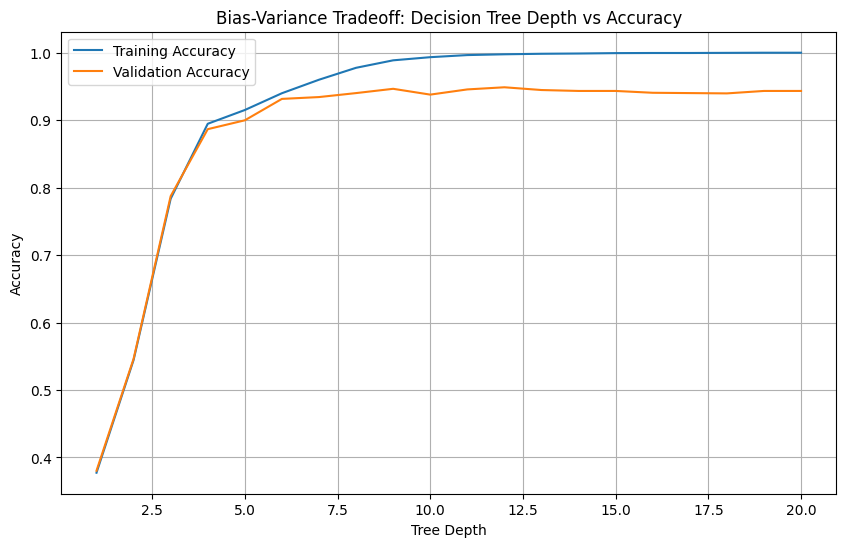

In [7]:
#Step 3: Vary Tree Depth and Analyze Bias-Variance Tradeoff
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

train_accuracies = []
val_accuracies = []
depth_range = range(1, 21)

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_sub, y_train_sub.values.ravel())  # Flatten labels
    
    # Evaluate on training and validation sets
    train_accuracies.append(accuracy_score(y_train_sub, model.predict(X_train_sub)))
    val_accuracies.append(accuracy_score(y_val, model.predict(X_val)))

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracies, label='Training Accuracy')
plt.plot(depth_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff: Decision Tree Depth vs Accuracy')
plt.legend()
plt.grid()
plt.show()


In [8]:
#Step 4: Evaluate the Final Model on Test Data
# Final training on the full training set
best_depth = 5
final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_model.fit(X_train, y_train.values.ravel())

# Evaluate on the test set
test_accuracy = accuracy_score(y_test, final_model.predict(X_test))
print(f"Test Accuracy with max_depth={best_depth}: {test_accuracy:.2f}")


Test Accuracy with max_depth=5: 0.84
